In [56]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("titanic.csv")
connection = sql.connect('titanic.db')
df.to_sql('titanic', connection, if_exists='replace', index=False)

891

In [15]:
cur = connection.cursor()

In [16]:
def komut_calistir(query):
    return pd.read_sql_query(query, connection)

In [26]:
df.sample()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.55,C124,S


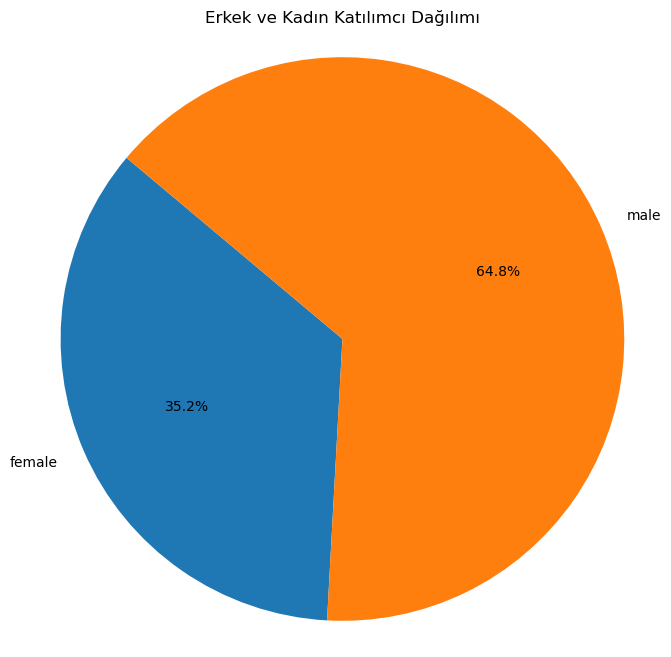

In [20]:
# 1. Cinsiyete göre katılımcı sayılarını alalım
query_gender = '''
SELECT Sex, COUNT(*) AS ParticipantCount
FROM titanic
GROUP BY Sex
'''

result_gender = komut_calistir(query_gender)

# Dağılımı görselleştirelim
plt.figure(figsize=(8, 8))
plt.pie(result_gender['ParticipantCount'], labels=result_gender['Sex'], autopct='%1.1f%%', startangle=140)
plt.title('Erkek ve Kadın Katılımcı Dağılımı')
plt.axis('equal')  # Daireyi daire şeklinde ayarla
plt.show()

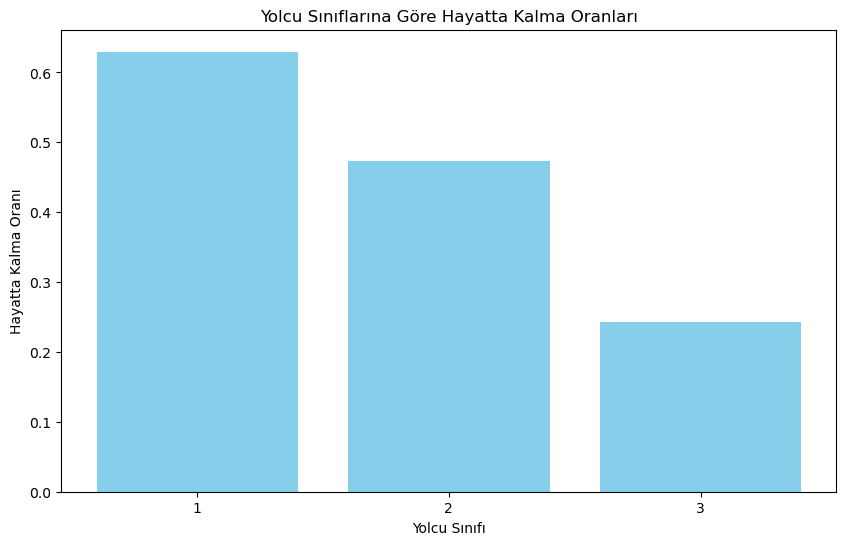

In [28]:
# 2. Yolcu sınıflarına göre hayatta kalma oranları:

query2 = '''
SELECT Pclass, AVG(Survived) AS SurvivalRate
FROM titanic
GROUP BY Pclass;
'''

result2 = komut_calistir(query2)
# SQL sorgusu sonuçlarını kullanarak görselleştirme
result_class_survival = {'Pclass': [1, 2, 3], 'SurvivalRate': [0.629630, 0.472826, 0.242363]}

plt.figure(figsize=(10, 6))
plt.bar(result_class_survival['Pclass'], result_class_survival['SurvivalRate'], color='skyblue')
plt.title('Yolcu Sınıflarına Göre Hayatta Kalma Oranları')
plt.xlabel('Yolcu Sınıfı')
plt.ylabel('Hayatta Kalma Oranı')
plt.xticks(result_class_survival['Pclass'])
plt.show()

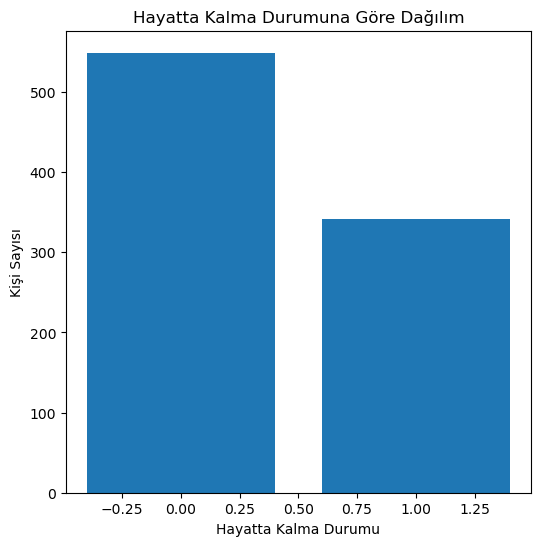

In [30]:
# 3. Hayatta kalan ve hayatını kaybedenlerin sayılarını alalım
query3 = '''
SELECT Survived, COUNT(*) AS Count
FROM titanic
GROUP BY Survived
'''
result3 = komut_calistir(query3)

# Dağılımı görselleştirelim
plt.figure(figsize=(6, 6))
plt.bar(result3['Survived'], result3['Count'])
plt.xlabel('Hayatta Kalma Durumu')
plt.ylabel('Kişi Sayısı')
plt.title('Hayatta Kalma Durumuna Göre Dağılım')
plt.show()

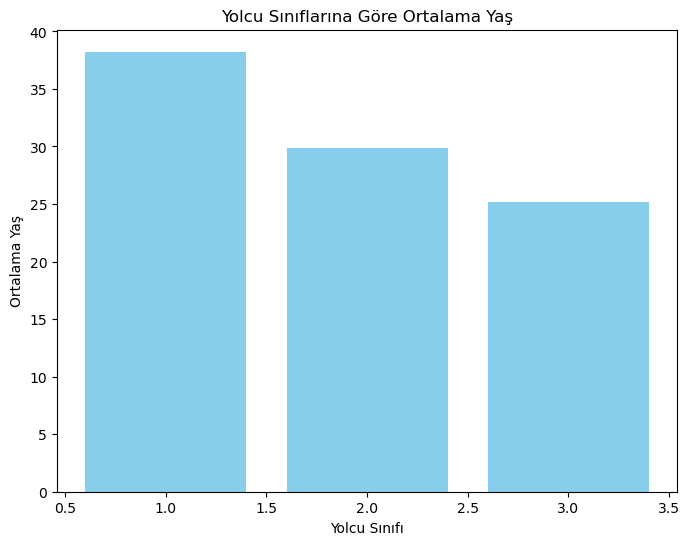

In [32]:
# 4. Yolcu sınıflarına göre yaş ortalamalarını alalım
query4 = '''
SELECT Pclass, AVG(Age) AS AverageAge
FROM titanic
GROUP BY Pclass
'''
result4= komut_calistir(query4)

# Dağılımı görselleştirelim
plt.figure(figsize=(8, 6))
plt.bar(result4['Pclass'], result4['AverageAge'], color='skyblue')
plt.xlabel('Yolcu Sınıfı')
plt.ylabel('Ortalama Yaş')
plt.title('Yolcu Sınıflarına Göre Ortalama Yaş')
plt.show()

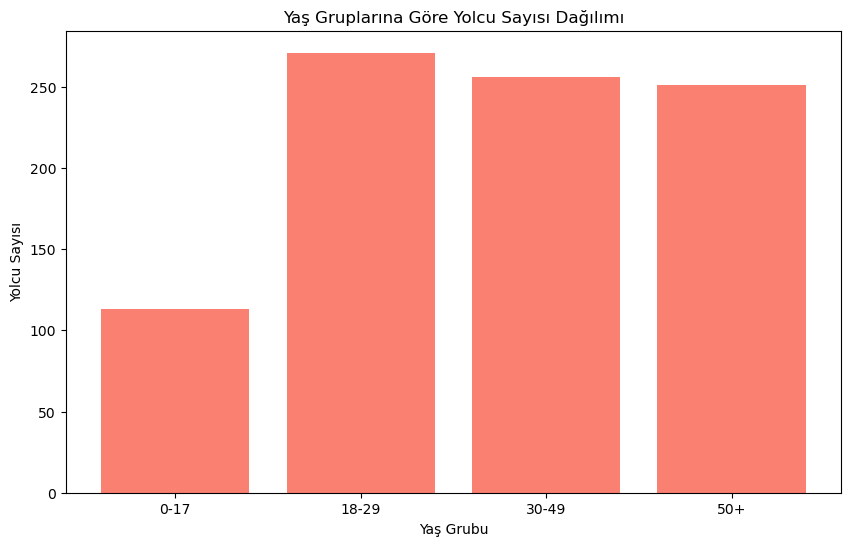

In [36]:
# 5. Her yaş grubundaki yolcu sayılarını alalım
query5 = '''
SELECT CASE
            WHEN Age < 18 THEN '0-17'
            WHEN Age >= 18 AND Age < 30 THEN '18-29'
            WHEN Age >= 30 AND Age < 50 THEN '30-49'
            ELSE '50+'
        END AS AgeGroup,
        COUNT(*) AS PassengerCount
FROM titanic
GROUP BY AgeGroup
'''
result5 = komut_calistir(query5)

# Dağılımı görselleştirelim
plt.figure(figsize=(10, 6))
plt.bar(result5['AgeGroup'], result5['PassengerCount'], color='salmon')
plt.xlabel('Yaş Grubu')
plt.ylabel('Yolcu Sayısı')
plt.title('Yaş Gruplarına Göre Yolcu Sayısı Dağılımı')
plt.show()


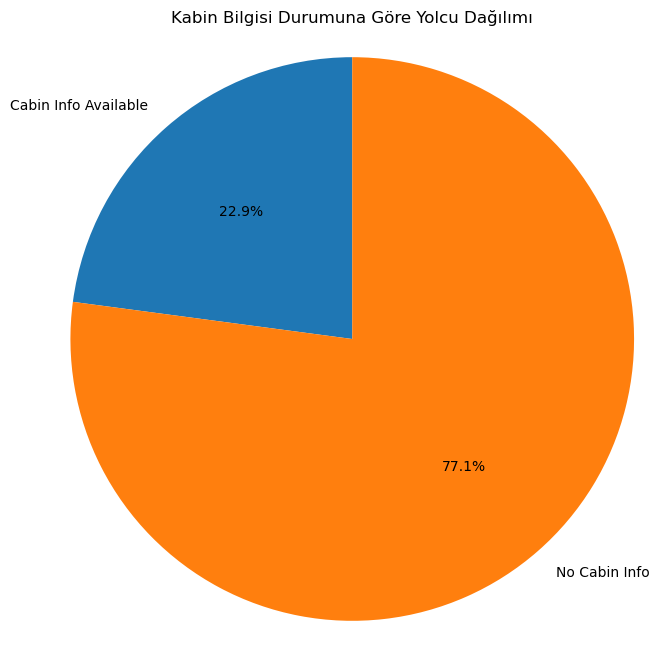

In [37]:
# 6. Kabin bilgisi olan ve olmayan yolcu sayılarını alalım
query6 = '''
SELECT CASE
            WHEN Cabin IS NULL THEN 'No Cabin Info'
            ELSE 'Cabin Info Available'
        END AS CabinInfo,
        COUNT(*) AS PassengerCount
FROM titanic
GROUP BY CabinInfo
'''
result6 = komut_calistir(query6)

# Dağılımı görselleştirelim
plt.figure(figsize=(8, 8))
plt.pie(result6['PassengerCount'], labels=result6['CabinInfo'], autopct='%1.1f%%', startangle=90)
plt.title('Kabin Bilgisi Durumuna Göre Yolcu Dağılımı')
plt.axis('equal')
plt.show()

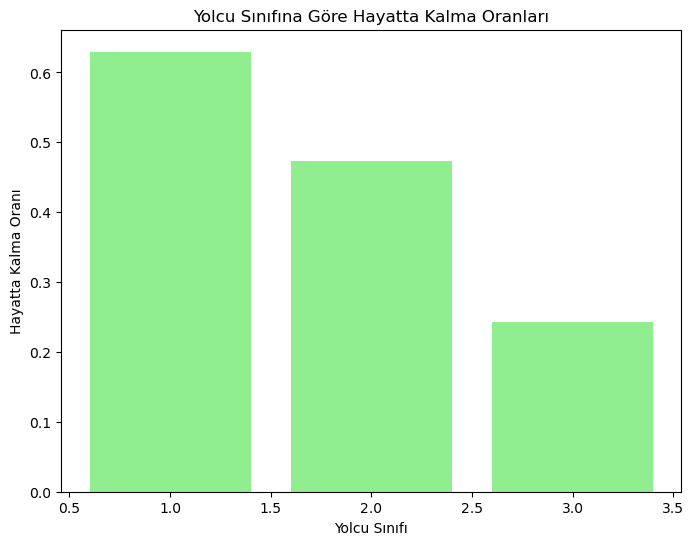

In [38]:
# 7. Yolcu sınıfına göre hayatta kalma oranlarını alalım
query7 = '''
SELECT Pclass, AVG(Survived) AS SurvivalRate
FROM titanic
GROUP BY Pclass
'''
result7 = komut_calistir(query7)

# Dağılımı görselleştirelim
plt.figure(figsize=(8, 6))
plt.bar(result7['Pclass'], result7['SurvivalRate'], color='lightgreen')
plt.xlabel('Yolcu Sınıfı')
plt.ylabel('Hayatta Kalma Oranı')
plt.title('Yolcu Sınıfına Göre Hayatta Kalma Oranları')
plt.show()

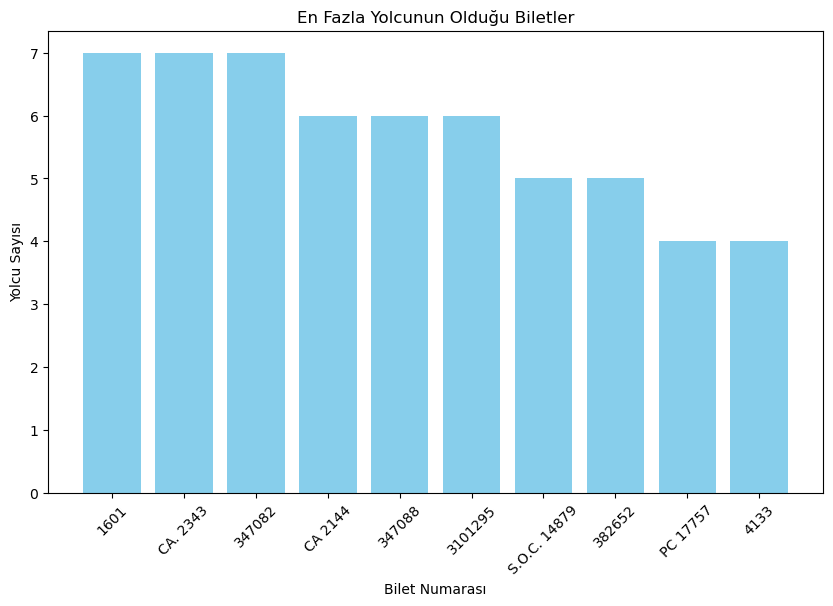

In [39]:
# 8. Aynı bilete sahip yolcuların sayılarını alalım
query8 = '''
SELECT Ticket, COUNT(*) AS PassengerCount
FROM titanic
GROUP BY Ticket
'''
result8 = komut_calistir(query8)

# Dağılımı görselleştirelim
result8.sort_values(by='PassengerCount', ascending=False, inplace=True)
top_tickets = result8.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_tickets['Ticket'], top_tickets['PassengerCount'], color='skyblue')
plt.xlabel('Bilet Numarası')
plt.ylabel('Yolcu Sayısı')
plt.title('En Fazla Yolcunun Olduğu Biletler')
plt.xticks(rotation=45)
plt.show()

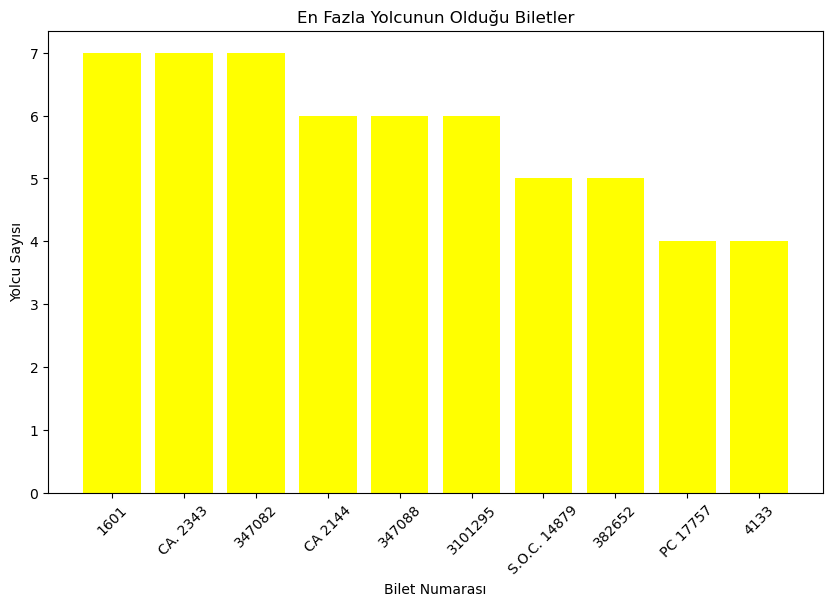

In [66]:
# 9. Aynı bilete sahip yolcuların sayılarını alalım
query9 = '''
SELECT Ticket, COUNT(*) AS PassengerCount
FROM titanic
GROUP BY Ticket
'''
result9 = komut_calistir(query9)

# Dağılımı görselleştirelim
result9.sort_values(by='PassengerCount', ascending=False, inplace=True)
top_tickets = result9.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_tickets['Ticket'], top_tickets['PassengerCount'], color='yellow')
plt.xlabel('Bilet Numarası')
plt.ylabel('Yolcu Sayısı')
plt.title('En Fazla Yolcunun Olduğu Biletler')
plt.xticks(rotation=45)
plt.show()

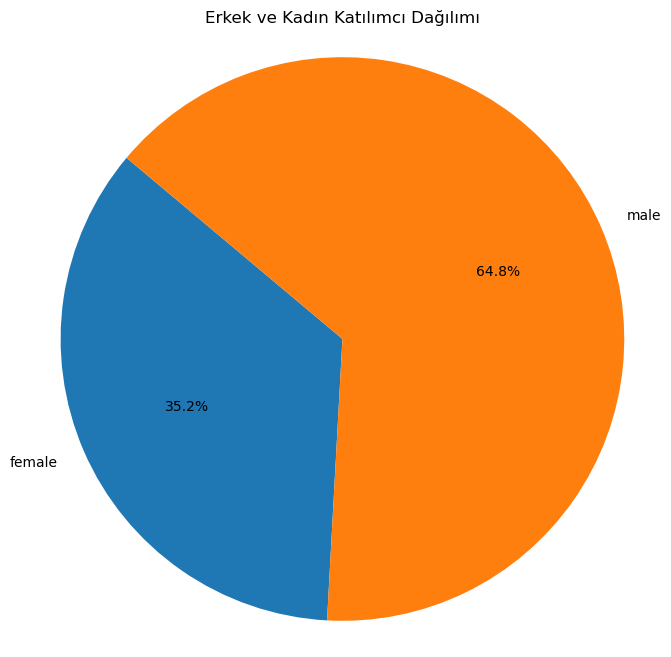

In [71]:
# 10. Cinsiyete göre katılımcı sayıları
query10 = '''
SELECT Sex, COUNT(*) AS ParticipantCount
FROM titanic
GROUP BY Sex
'''
result10 = komut_calistir(query10)

# Dağılımı görselleştirelim
plt.figure(figsize=(8, 8))
plt.pie(result10['ParticipantCount'], labels=result_gender['Sex'], autopct='%1.1f%%', startangle=140)
plt.title('Erkek ve Kadın Katılımcı Dağılımı')
plt.axis('equal')  # Daireyi daire şeklinde ayarla
plt.show()